<a href="https://colab.research.google.com/github/adniaristides/start/blob/main/Predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sales predictive model from marketing investiments 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/adniaristides/start/main/dataset/advertising.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
      TV  Radio  Jornal  Vendas
0  230.1   37.8    69.2    22.1
1   44.5   39.3    45.1    10.4
2   17.2   45.9    69.3    12.0
3  151.5   41.3    58.5    16.5
4  180.8   10.8    58.4    17.9


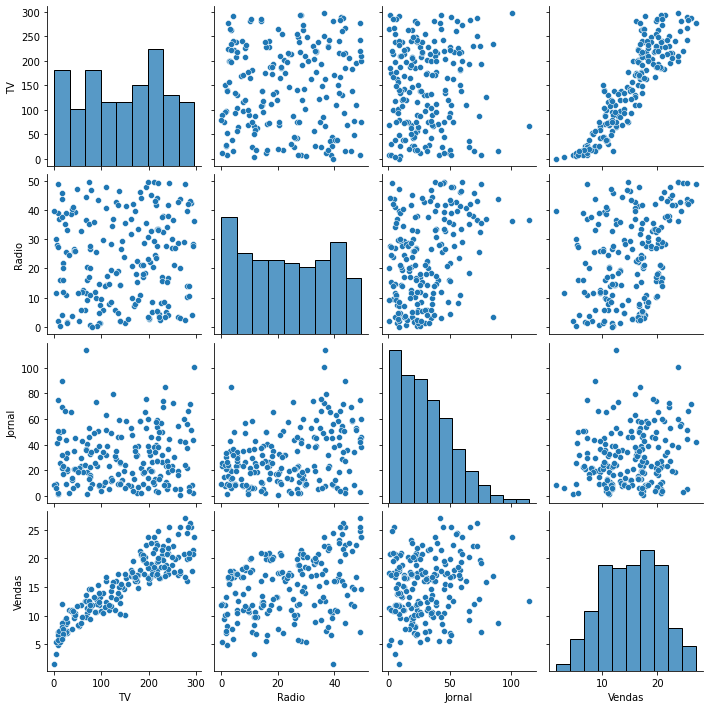

In [7]:
#Correlations
sns.pairplot(df)
plt.show()

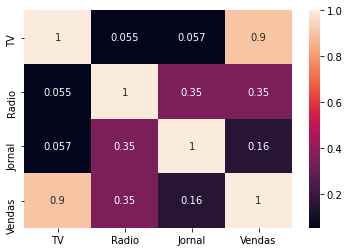

In [10]:
#Correlations
sns.heatmap(df.corr(),annot=True)

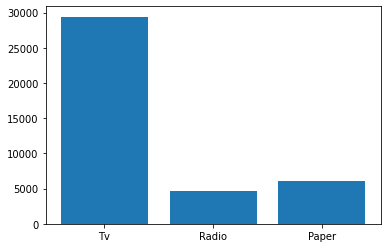

In [34]:
#Where does the company spend more
tv = df['TV'].sum()
radio = df['Radio'].sum()
paper = df['Jornal'].sum()

x_cc = ['Tv','Radio','Paper']
y_cc = [tv,radio,paper]

plt.bar(x_cc,y_cc)
plt.show()

In [15]:
#Defining test data
x = df.drop(['Vendas'],axis=1)
y = df['Vendas']

x_treino, x_teste,y_treino,y_teste = train_test_split(x,y)

In [16]:
#Creating AI
linear = LinearRegression()
randomforest = RandomForestRegressor()

In [17]:
#Training AI
linear.fit(x_treino,y_treino)
randomforest.fit(x_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
#Checking models accuracy 
teste_linear = linear.predict(x_teste)
teste_randomforest = randomforest.predict(x_teste)

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_randomforest = metrics.r2_score(y_teste,teste_randomforest)
print(r2_linear, r2_randomforest)

0.8927804824174643 0.9229235367666611


In [21]:
# Mean Squared Error(MSE)
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_randomforest = metrics.mean_squared_error(y_teste,teste_randomforest)
print(erro_linear, erro_randomforest)

2.533824076974521 1.8214799199999998


In [23]:
#Comparing model results with real data
tab = pd.DataFrame() #empty dataset
tab['real data'] = y_teste #add column with currenty data
tab['test data'] = teste_randomforest #add column with predicted data
tab = tab.reset_index(drop=True) 
print(tab)

    real data  test data
0        17.0     17.380
1        17.4     18.059
2        17.3     18.870
3        10.6     11.363
4         7.3      6.374
5         7.2      7.456
6         9.6     10.137
7        12.3     11.765
8        10.1     14.779
9        17.6     19.432
10       11.9     11.334
11       13.6     13.856
12       20.1     18.703
13       24.4     23.154
14       23.8     22.725
15       11.9     12.132
16       21.5     21.530
17       16.5     18.992
18        5.6      6.404
19       12.0     11.020
20       11.5     12.682
21        9.2      8.707
22       16.7     16.169
23       16.7     16.352
24       20.5     19.989
25       12.0      7.564
26       16.9     17.187
27       25.5     25.089
28       18.0     18.700
29       17.9     17.019
30       12.9     12.560
31       16.6     17.889
32       15.2     14.223
33       20.8     19.551
34       15.5     14.088
35       18.0     17.936
36       13.2     11.014
37       14.2     13.998
38        8.7     10.054


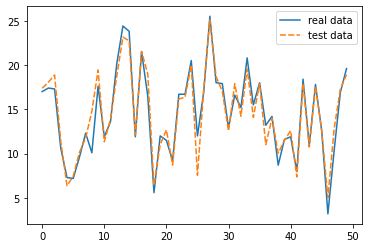

In [24]:
sns.lineplot(data=tab)
plt.show()

In [25]:
print(randomforest.feature_importances_)

[0.85167272 0.13388361 0.01444368]
